In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#% matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
import tensorflow as tf
import os
import dask.dataframe as dd
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

root = r'D:\data\1_NYC_city_taxi\raw_data'
train_fname ='train.csv'
test_fname = 'test.csv'

In [4]:
# read data in pandas dataframe
df_train =  pd.read_csv(os.path.join(root,train_fname), nrows = 1000000, parse_dates=["pickup_datetime"])

In [5]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
key                  1000000 non-null object
fare_amount          1000000 non-null float64
pickup_datetime      1000000 non-null datetime64[ns]
pickup_longitude     1000000 non-null float64
pickup_latitude      1000000 non-null float64
dropoff_longitude    999990 non-null float64
dropoff_latitude     999990 non-null float64
passenger_count      1000000 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 61.0+ MB


In [7]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


### Data cleaning
* Droping Missing Value (결측치 없애기)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
key                  1000000 non-null object
fare_amount          1000000 non-null float64
pickup_datetime      1000000 non-null datetime64[ns]
pickup_longitude     1000000 non-null float64
pickup_latitude      1000000 non-null float64
dropoff_longitude    999990 non-null float64
dropoff_latitude     999990 non-null float64
passenger_count      1000000 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 61.0+ MB


In [9]:
df_train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [10]:
df_train_nadrop = df_train.dropna()

In [11]:
df_train_nadrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999990 entries, 0 to 999999
Data columns (total 8 columns):
key                  999990 non-null object
fare_amount          999990 non-null float64
pickup_datetime      999990 non-null datetime64[ns]
pickup_longitude     999990 non-null float64
pickup_latitude      999990 non-null float64
dropoff_longitude    999990 non-null float64
dropoff_latitude     999990 non-null float64
passenger_count      999990 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 68.7+ MB


In [12]:
df_train_nadrop.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## EDA
### 1. Histogram
#### checking passenger count, fare_amount distribution
#### 승객 수, 요금 시각화를 통한 분포 파악

### 2. Box Plot

In [13]:
df_train_nadrop.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


* Mostly under 20$ (대부분 요금이 20달러 이하)
* Long tail distribution (긴 꼬리 분포)

Text(0.5,1,'fare histogram')

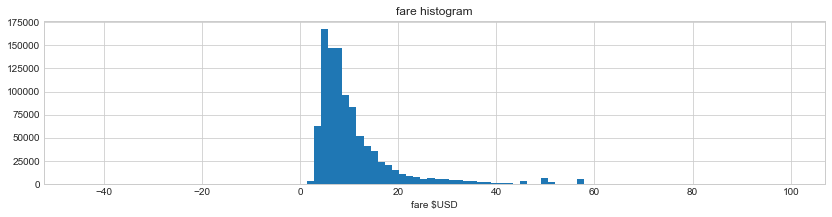

In [14]:
df_train_nadrop[df_train_nadrop.fare_amount < 100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('fare histogram')

Text(0.5,1,'fare histogram smaller than  0')

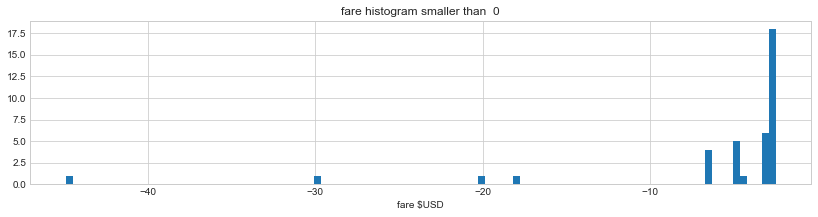

In [15]:
df_train_nadrop[df_train_nadrop.fare_amount < 0].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('fare histogram smaller than  0')

In [16]:
df_train_plus = df_train_nadrop[df_train_nadrop.fare_amount >= 0]

In [17]:
df_train_plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999952 entries, 0 to 999999
Data columns (total 8 columns):
key                  999952 non-null object
fare_amount          999952 non-null float64
pickup_datetime      999952 non-null datetime64[ns]
pickup_longitude     999952 non-null float64
pickup_latitude      999952 non-null float64
dropoff_longitude    999952 non-null float64
dropoff_latitude     999952 non-null float64
passenger_count      999952 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 68.7+ MB


Text(0.5,1,'passenger histogram smaller than  0')

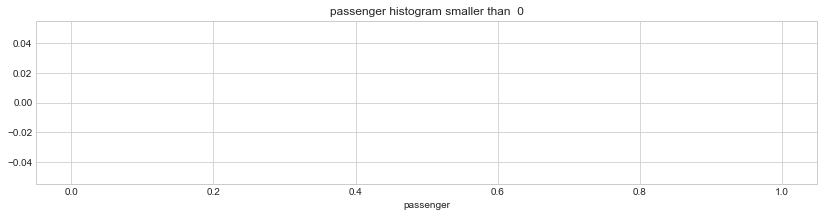

In [18]:
df_train_plus[df_train_plus.passenger_count < 0].passenger_count.hist(bins=100, figsize=(14,3))
plt.xlabel('passenger')
plt.title('passenger histogram smaller than  0')

Text(0.5,1,'passenger histogram more than  6')

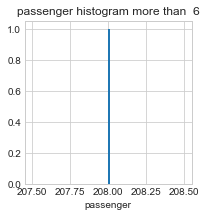

In [19]:
df_train_plus[df_train_plus.passenger_count > 6].passenger_count.hist(bins=100, figsize=(3,3))
plt.xlabel('passenger')
plt.title('passenger histogram more than  6')

In [20]:
df_train_plus_p = df_train_plus[df_train_plus.passenger_count <=6]

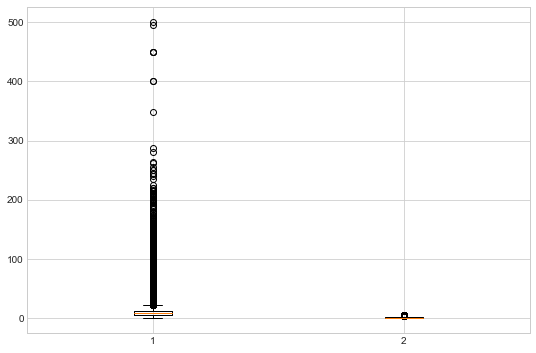

In [21]:
np.random.seed(1234)
data_to_plot = [df_train_plus_p.fare_amount.tolist(), df_train_plus_p.passenger_count.tolist()]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)

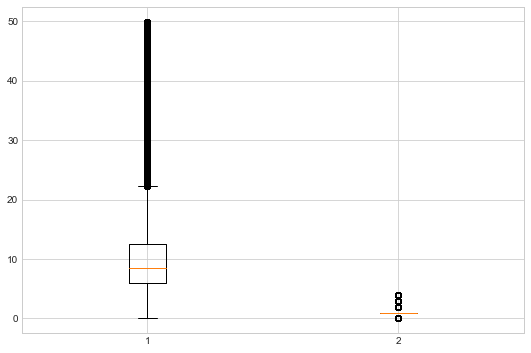

In [22]:
data_to_plot = [df_train_plus_p[df_train_plus_p.fare_amount < 50].fare_amount.tolist(),
                df_train_plus_p[df_train_plus_p.passenger_count < 5].passenger_count.tolist()]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)

* 대부분 1인 승객

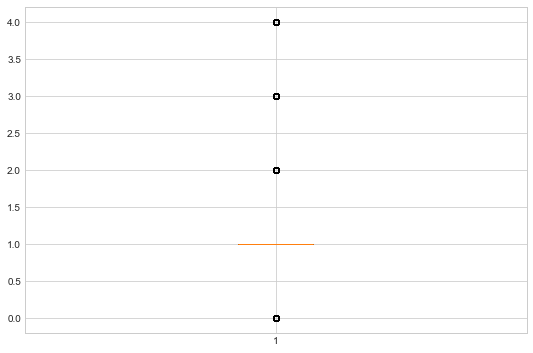

In [23]:
data_to_plot = df_train_plus_p[df_train_plus_p.passenger_count < 5].passenger_count.tolist()

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)

## Feature Engineering
#### 1. Making in to Haversine Distance (좌표를 이용해 거리 계산)
#### 2. Outlier detection using test data (테스트 데이터를 이용한 이상치 제거)
#### 3. Clustering  ( 택시 승차한 곳, 하차한 곳, 승차 + 하차 한 곳 기반)
* Cluserting by pick up, drop off , pick up + drop off 

Haversine Distance

In [24]:
df_train_plus_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999951 entries, 0 to 999999
Data columns (total 8 columns):
key                  999951 non-null object
fare_amount          999951 non-null float64
pickup_datetime      999951 non-null datetime64[ns]
pickup_longitude     999951 non-null float64
pickup_latitude      999951 non-null float64
dropoff_longitude    999951 non-null float64
dropoff_latitude     999951 non-null float64
passenger_count      999951 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 68.7+ MB


In [25]:
df_train_plus_p.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [26]:
'''
Calculate distance using the Haversine Formula
출처 : https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula
'''
def haversine(lat1, lon1, lat2, lon2):
    import math
    import numpy as np

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)


    R = 6371000  # radius of Earth in meters
    phi_1 = np.radians(lat1)
    phi_2 = np.radians(lat2)

    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi_1) * np.cos(phi_2) * np.sin(delta_lambda / 2.0) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)
    km = round(km, 3)


    
    return  km

In [27]:
km = haversine(df_train_plus_p['pickup_latitude'],df_train_plus_p['pickup_longitude'],
         df_train_plus_p['dropoff_latitude'],df_train_plus_p['dropoff_longitude'])

In [28]:
df_train_plus_p['haversine'] = km

c:\program files\anaconda3\envs\cuda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_train_plus_p.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.031
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.390
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999


### Oulier 제거
### test data 이용

In [30]:
df_test =  pd.read_csv(os.path.join(root,test_fname), parse_dates = ["pickup_datetime"])


In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
key                  9914 non-null object
pickup_datetime      9914 non-null datetime64[ns]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 542.2+ KB


Data cleansing using Bounding Box

In [32]:
### minimum and maximum of pickup and dropoff longtitue latitude

bounding_box = {}

bounding_box['p_long_min'] = df_test.pickup_longitude.min()
bounding_box['p_long_max'] = df_test.pickup_longitude.max()
bounding_box['d_long_min'] = df_test.dropoff_longitude.min()
bounding_box['d_long_max'] = df_test.dropoff_longitude.max()

In [33]:
bounding_box['p_lat_min'] = df_test.pickup_latitude.min()
bounding_box['p_lat_max'] = df_test.pickup_latitude.max()
bounding_box['d_lat_min'] = df_test.dropoff_latitude.min()
bounding_box['d_lat_max'] = df_test.dropoff_latitude.max()

In [34]:
bounding_box

{'d_lat_max': 41.696683,
 'd_lat_min': 40.568973,
 'd_long_max': -72.990963,
 'd_long_min': -74.263242,
 'p_lat_max': 41.709555,
 'p_lat_min': 40.573143,
 'p_long_max': -72.986532,
 'p_long_min': -74.252193}

In [35]:
(df_train_plus_p.pickup_longitude >= bounding_box['p_long_min']) & (df_train_plus_p.pickup_longitude >= bounding_box['p_long_min'])

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
          ... 
999970    True
999971    True
999972    True
999973    True
999974    True
999975    True
999976    True
999977    True
999978    True
999979    True
999980    True
999981    True
999982    True
999983    True
999984    True
999985    True
999986    True
999987    True
999988    True
999989    True
999990    True
999991    True
999992    True
999993    True
999994    True
999995    True
999996    True
999997    True
999998    True
999999    True
Name: pickup_longitude, Length: 999951, dtype: bool

In [36]:
### Index를 리턴하는 것 처럼 
### return 값에 괄호를 쳐줘야!!!
def selecting_bb(df,bb):
    
    return (df.pickup_longitude >=bb['p_long_min']) & (df.pickup_longitude <= bb['p_long_max']) &\
        (df.pickup_latitude >= bb['p_lat_min']) & (df.pickup_latitude <= bb['p_lat_max']) &\
        (df.dropoff_longitude >= bb['d_long_min']) & (df.dropoff_longitude <= bb['d_long_max'])&\
        (df.dropoff_latitude >= bb['d_lat_min']) & (df.dropoff_latitude <= bb['d_lat_max'])

In [37]:
df_train_plus_p = df_train_plus_p[selecting_bb(df_train_plus_p,bounding_box)]

In [38]:
df_train_plus_p.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.031
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.390
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999


Clustering by Location

* using pickup_longitude
* Save the clusterinng object

starting clustering 1
starting clustering 2
starting clustering 3
starting clustering 4
starting clustering 5
starting clustering 6
starting clustering 7
starting clustering 8
starting clustering 9
starting clustering 10
starting clustering 11
starting clustering 12
starting clustering 13
starting clustering 14


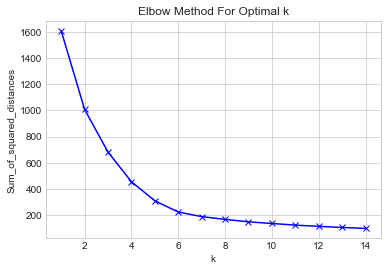

In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Dictionary to keep cluster object
cluster_dict = {}

data_location = df_train_plus_p[['pickup_longitude','pickup_latitude']]

mms = MinMaxScaler()
mms.fit(data_location)
data_transformed = mms.transform(data_location)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    print("starting clustering",k)
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
## Elbow point 8

km_pick_up = KMeans(n_clusters=6)
km_pick_up_result = km_pick_up.fit(data_transformed)

In [90]:
cluster_dict  = {}
data_location = df_train_plus_p[['pickup_longitude','pickup_latitude']]
cluster_dict['pick_up'] = km_pick_up_result
plt.hist((km_pick_up_result.labels_))

ValueError: Wrong number of items passed 4, placement implies 1

Seems like outliers

In [71]:
data_location[km_pick_up_result.labels_ == 3]

,pickup_longitude,pickup_latitude
251,-73.789506,40.647040
286,-73.781127,40.645007
320,-73.776747,40.645265
437,-73.790250,40.643705
510,-73.782215,40.644272
552,-73.789985,40.646382
582,-73.788127,40.647295
616,-73.794116,40.657058
622,-73.776720,40.645412
676,-73.789203,40.655194


In [72]:
data_location[km_pick_up_result.labels_ == 2]

,pickup_longitude,pickup_latitude
1684,-73.137393,41.366138
3075,-73.137393,41.366138
4487,-73.137393,41.366138
5648,-73.137393,41.366138
5663,-73.137393,41.366138
6416,-73.137393,41.366138
7043,-73.137393,41.366138
9808,-73.137393,41.366138
10688,-73.137393,41.366138
14367,-73.137393,41.366138


In [73]:
data_location[km_pick_up_result.labels_ == 1]

,pickup_longitude,pickup_latitude
2,-73.982738,40.761270
6,-73.980002,40.751662
12,-73.991601,40.744712
16,-73.986430,40.760465
17,-73.981060,40.737690
19,-73.979815,40.751902
20,-73.985382,40.747858
22,-73.991707,40.770505
23,-74.000632,40.747473
24,-73.969622,40.756973


starting cluerting 1
starting cluerting 2
starting cluerting 3
starting cluerting 4
starting cluerting 5
starting cluerting 6
starting cluerting 7
starting cluerting 8
starting cluerting 9
starting cluerting 10
starting cluerting 11
starting cluerting 12
starting cluerting 13
starting cluerting 14


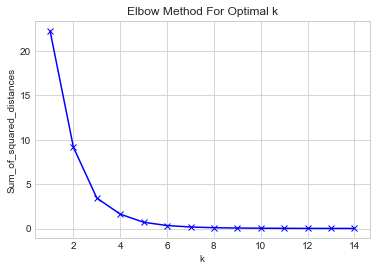

In [138]:

data_location = df_train_plus_p[['dropoff_longitude','dropoff_latitude']]

mms = MinMaxScaler()
mms.fit(data_location)
data_transformed = mms.transform(data_location)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    print("starting cluerting",k)
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

(array([5.23309e+05, 0.00000e+00, 0.00000e+00, 1.71650e+04, 0.00000e+00,
        0.00000e+00, 3.60000e+02, 0.00000e+00, 0.00000e+00, 4.37967e+05]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

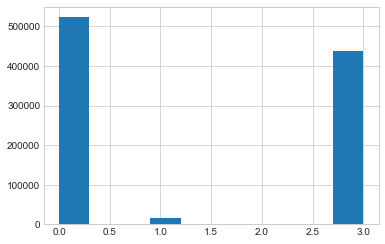

In [80]:
km = KMeans(n_clusters=4)
km_dropoff_result = km.fit(data_transformed)

cluster_dict['drop_off'] = km_dropoff_result

plt.hist((km_dropoff_result.labels_))

In [88]:
data_location[km.labels_ == 3]

,pickup_longitude,pickup_latitude
2,-73.982738,40.761270
4,-73.968095,40.768008
7,-73.951300,40.774138
16,-73.986430,40.760465
18,-73.969505,40.784843
21,-73.957954,40.779252
22,-73.991707,40.770505
24,-73.969622,40.756973
32,-73.873027,40.773883
38,-73.957740,40.773617


In [76]:
data_location[km.labels_ == 1]

,pickup_longitude,pickup_latitude
0,-73.844311,40.721319
204,-73.795677,40.807722
251,-73.789506,40.647040
286,-73.781127,40.645007
320,-73.776747,40.645265
396,-73.844904,40.736318
437,-73.790250,40.643705
510,-73.782215,40.644272
552,-73.789985,40.646382
582,-73.788127,40.647295


In [77]:
data_location[km.labels_ == 2]

,pickup_longitude,pickup_latitude
2,-73.982738,40.761270
4,-73.968095,40.768008
7,-73.951300,40.774138
16,-73.986430,40.760465
18,-73.969505,40.784843
21,-73.957954,40.779252
22,-73.991707,40.770505
24,-73.969622,40.756973
32,-73.873027,40.773883
38,-73.957740,40.773617


In [78]:
# 그냥 outlier..
data_location[km.labels_ == 3]

,pickup_longitude,pickup_latitude
1684,-73.137393,41.366138
3075,-73.137393,41.366138
4487,-73.137393,41.366138
5648,-73.137393,41.366138
5663,-73.137393,41.366138
6416,-73.137393,41.366138
7043,-73.137393,41.366138
9808,-73.137393,41.366138
10688,-73.137393,41.366138
14367,-73.137393,41.366138


starting cluerting 1
starting cluerting 2
starting cluerting 3
starting cluerting 4
starting cluerting 5
starting cluerting 6
starting cluerting 7
starting cluerting 8
starting cluerting 9
starting cluerting 10
starting cluerting 11
starting cluerting 12
starting cluerting 13
starting cluerting 14


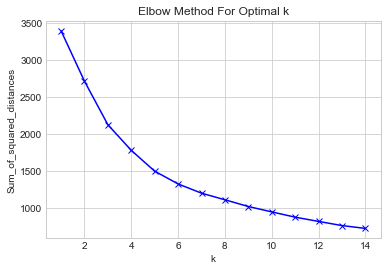

In [94]:
## Clustering for all pickup, drop off, 

data_location = df_train_plus_p[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]

mms = MinMaxScaler()
mms.fit(data_location)
data_transformed = mms.transform(data_location)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    print("starting cluerting",k)
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

(array([2.58589e+05, 3.72000e+02, 0.00000e+00, 4.19985e+05, 0.00000e+00,
        1.62900e+04, 2.75650e+04, 0.00000e+00, 2.30318e+05, 2.56820e+04]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

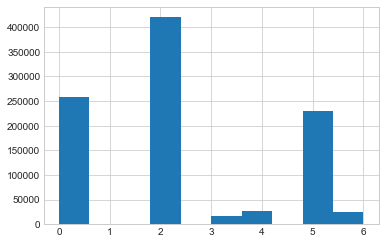

In [95]:
km = KMeans(n_clusters=7)
km_pickanddrop = km.fit(data_transformed)
cluster_dict['pickanddrop'] = km_pickanddrop

plt.hist((km_pickanddrop.labels_))

In [99]:
km.predict(data_transformed)

array([3, 2, 2, ..., 2, 2, 2])

In [ ]:
km.s

## Using Cluster label to make columns

In [39]:
def makingClustCol(df,clust_dict):
    
    ## Pick up cluster
    data_location = df[['pickup_longitude','pickup_latitude']]
    mms = MinMaxScaler()
    mms.fit(data_location)
    data_transformed = mms.transform(data_location)
    
    km = clust_dict['pick_up']
    df['clust_pickup'] = km.predict(data_transformed)
    
    ## Drop off cluster
    data_location = df[['dropoff_longitude','dropoff_latitude']]
    mms = MinMaxScaler()
    mms.fit(data_location)
    data_transformed = mms.transform(data_location)
    
    km = clust_dict['drop_off']
    df['clust_dropoff'] = km.predict(data_transformed)
    
    
    ## Drop off + pick up cluster
    data_location = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
    mms = MinMaxScaler()
    mms.fit(data_location)
    data_transformed = mms.transform(data_location)
    
    km = clust_dict['pickanddrop']
    df['clust_pickanddrop'] = km.predict(data_transformed)
    
    
    return df

In [40]:
df_train_plus_p.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.031
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.390
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999


In [41]:
df_train_plus_p = makingClustCol(df_train_plus_p,cluster_dict)

NameError: name 'cluster_dict' is not defined

In [ ]:
df_train_plus_p.head()

### Spliting datetime -> year, month, day, time

In [ ]:
df_train_plus_p['year'] = df_train_plus_p.pickup_datetime.apply(lambda t: t.year)
df_train_plus_p['weekday'] = df_train_plus_p.pickup_datetime.apply(lambda t: t.weekday())
df_train_plus_p['hour'] = df_train_plus_p.pickup_datetime.apply(lambda t: t.hour)

## Preprocessing Test data

In [42]:
km_test = haversine(df_test['pickup_latitude'],df_test['pickup_longitude'],
         df_test['dropoff_latitude'],df_test['dropoff_longitude'])

In [43]:
df_test['haversine'] = km_test

In [52]:
##data from utils 
cluster_dict =data['cluster_obj']
df_test  = makingClustCol(df_test,cluster_dict)

In [45]:
df_test['year'] = df_test.pickup_datetime.apply(lambda t: t.year)
df_test['weekday'] = df_test.pickup_datetime.apply(lambda t: t.weekday())
df_test['hour'] = df_test.pickup_datetime.apply(lambda t: t.hour)

In [53]:
df_test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine,year,weekday,hour,clust_pickup,clust_dropoff,clust_pickanddrop
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323,2015,1,13,2,0,2
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425,2015,1,13,0,0,5
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.619,2011,5,11,0,0,2
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961,2012,5,21,2,0,2
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387,2012,5,21,2,0,2
5,2012-12-01 21:12:12.0000005,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1,3.223,2012,5,21,2,0,2
6,2011-10-06 12:10:20.0000001,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1,0.930,2011,3,12,2,3,0
7,2011-10-06 12:10:20.0000003,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1,21.540,2011,3,12,1,3,3
8,2011-10-06 12:10:20.0000002,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1,3.874,2011,3,12,0,0,5
9,2014-02-18 15:22:20.0000002,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1,1.100,2014,1,15,2,3,2


### Data Frame to csv

In [54]:
# outpath = os.path.join(root.replace('raw_data','preprocessed'))
# file_name = 'hav_clust_date.csv'
# df_train_plus_p.to_csv(os.path.join(outpath,file_name))

outpath = os.path.join(root.replace('raw_data','preprocessed'))
file_name = 'hav_clust_date_test.csv'
df_test.to_csv(os.path.join(outpath,file_name))

## pickling python objects
bounding box, cluster objects

In [125]:
preprocess_dict = {}
preprocess_dict['bounding_box'] = bounding_box
preprocess_dict['cluster_obj'] = cluster_dict

In [126]:
preprocess_dict

{'bounding_box': {'d_lat_max': 41.696683,
  'd_lat_min': 40.568973,
  'd_long_max': -72.990963,
  'd_long_min': -74.263242,
  'p_lat_max': 41.709555,
  'p_lat_min': 40.573143,
  'p_long_max': -72.986532,
  'p_long_min': -74.252193},
 'cluster_obj': {'drop_off': KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
      random_state=None, tol=0.0001, verbose=0),
  'pick_up': KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
      random_state=None, tol=0.0001, verbose=0),
  'pickanddrop': KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
      random_state=None, tol=0.0001, verbose=0)}}

In [136]:
import pickle

outpath = os.path.join(root.replace('raw_data','utils'))
filename = 'preprocess.pkl'

## Writing pickle file

with open(os.path.join(outpath,filename), 'wb') as f:
    pickle.dump(preprocess_dict, f)
    

In [48]:
import pickle
outpath = os.path.join(root.replace('raw_data','utils'))
filename = 'preprocess.pkl'
with open(os.path.join(outpath,filename), 'rb') as f:
    data = pickle.load(f)
    

In [49]:
data

{'bounding_box': {'d_lat_max': 41.696683,
  'd_lat_min': 40.568973,
  'd_long_max': -72.990963,
  'd_long_min': -74.263242,
  'p_lat_max': 41.709555,
  'p_lat_min': 40.573143,
  'p_long_max': -72.986532,
  'p_long_min': -74.252193},
 'cluster_obj': {'drop_off': KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
      random_state=None, tol=0.0001, verbose=0),
  'pick_up': KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
      random_state=None, tol=0.0001, verbose=0),
  'pickanddrop': KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
      random_state=None, tol=0.0001, verbose=0)}}